In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
dtf = ['data2.csv','data3.csv','data4.csv','data5.csv','data6.csv','data7.csv','data8.csv','data9.csv','data10.csv','data11.csv','data12.csv','data13.csv']

In [3]:
df= pd.read_csv('data1.csv')
for response in dtf:
    df1=pd.read_csv(response)
    df = df.append(df1,ignore_index=False)
#df
#df = pd.read_csv('data1.csv')
df['Age Bracket'].replace({'6 Months':'0.5','5 months':'0.47','18-28':'23','5 Months':'0.47','9 Months':'0.75','9 Month':'0.75',
                           '8 month':'0.67','16 DAYS':'0.05','2 Months':'0.5', '1 DAY':'0.01','s':'0','28-35':'31'},inplace = True)

blank_data = df.isnull().sum().sort_values()/len(df)*100
df

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases,Entry_ID
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1.0,NaN
3,4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1.0,NaN
4,5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,...,NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222181.0
3185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222182.0
3186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222183.0
3187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222184.0


Text(0, 0.5, '% value')

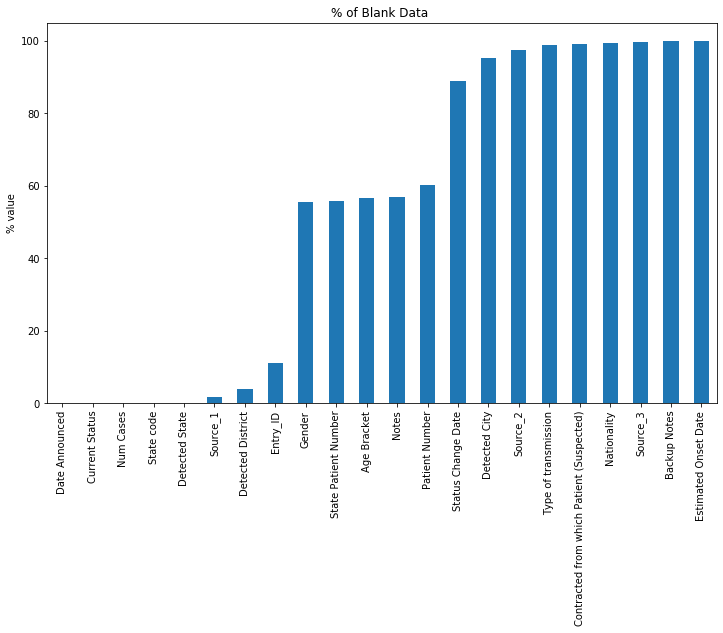

In [4]:
blank_data.plot.bar(figsize=(12,7))
plt.title('% of Blank Data ')
plt.ylabel('% value')

In [5]:
# Exclusion of blank data
df = df.loc[:,['Date Announced','Current Status','Detected State','Num Cases','Age Bracket','Gender']]

In [6]:
Date =df['Date Announced'].str.split('/',expand = True)
Date.columns=['Day','Month','Year']
df = pd.concat([df,Date],axis=1)

In [7]:
dfr = df[df['Current Status']=='Recovered']
dfd = df[df['Current Status']=='Deceased']
dfh  = df[df['Current Status']=='Hospitalized']

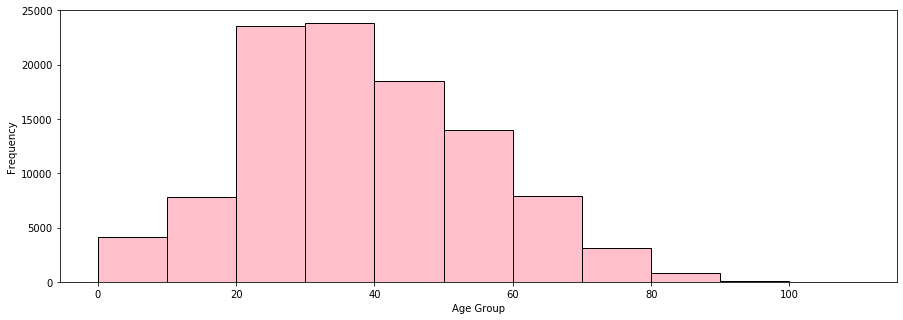

Text(0.5, 0, 'Age Group')

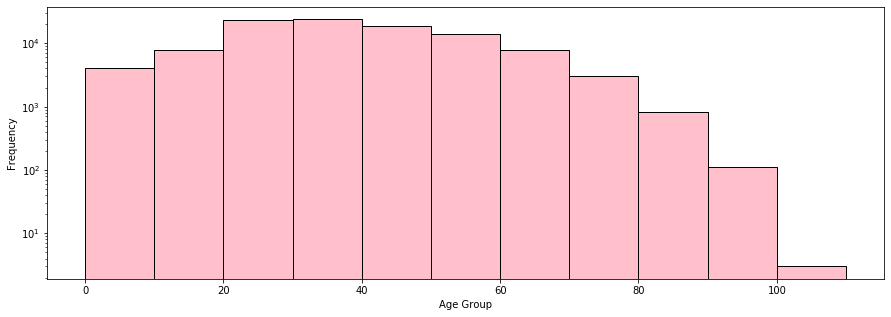

In [8]:
Age = dfh['Age Bracket'].astype('float')
bins=[0,10,20,30,40,50,60,70,80,90,100,110]
Age.plot.hist(Age,bins=bins,color='pink', edgecolor='black',log=False,figsize=(15,5))
plt.xlabel('Age Group')
plt.show()
Age.plot.hist(Age,bins=bins,color='pink', edgecolor='black',log=True,figsize=(15,5))
plt.xlabel('Age Group')

In [9]:
Gender = dfh['Gender'].value_counts()
Gender = Gender.iloc[0:2]
Gender

M    69433
F    36949
Name: Gender, dtype: int64

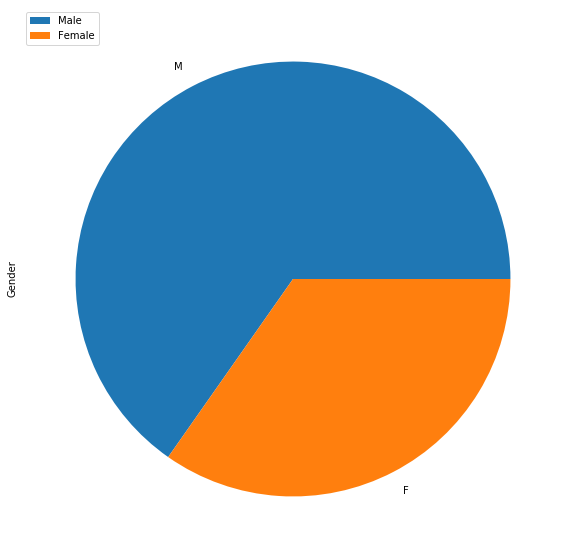

In [10]:
Gender.plot.pie(figsize=(10,10))
plt.legend(['Male','Female'],loc='upper left')
plt.show()

In [11]:
df.columns

Index(['Date Announced', 'Current Status', 'Detected State', 'Num Cases',
       'Age Bracket', 'Gender', 'Day', 'Month', 'Year'],
      dtype='object')

In [12]:
dfh

,Date Announced,Current Status,Detected State,Num Cases,Age Bracket,Gender,Day,Month,Year
18,04/03/2020,Hospitalized,Haryana,1.0,55,NaN,04,03,2020
19,04/03/2020,Hospitalized,Haryana,1.0,55,NaN,04,03,2020
21,04/03/2020,Hospitalized,Uttar Pradesh,1.0,NaN,M,04,03,2020
26,04/03/2020,Hospitalized,Uttar Pradesh,1.0,NaN,NaN,04,03,2020
27,04/03/2020,Hospitalized,Uttar Pradesh,1.0,NaN,NaN,04,03,2020
...,...,...,...,...,...,...,...,...,...
2765,08/08/2020,Hospitalized,Gujarat,226.0,NaN,NaN,08,08,2020
2766,08/08/2020,Hospitalized,Gujarat,21.0,NaN,NaN,08,08,2020
2767,08/08/2020,Hospitalized,Gujarat,2.0,NaN,NaN,08,08,2020
2768,08/08/2020,Hospitalized,Gujarat,113.0,NaN,NaN,08,08,2020


In [13]:
Month_count =dfh.groupby(['Month','Day'])['Num Cases'].sum()
Month_count

Month  Day
03     04         5.0
       05         1.0
       07         2.0
       09         4.0
       10         4.0
               ...   
08     04     51282.0
       05     56626.0
       06     62170.0
       07     61455.0
       08     55196.0
Name: Num Cases, Length: 156, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1291d27d0>,
      dtype=object)

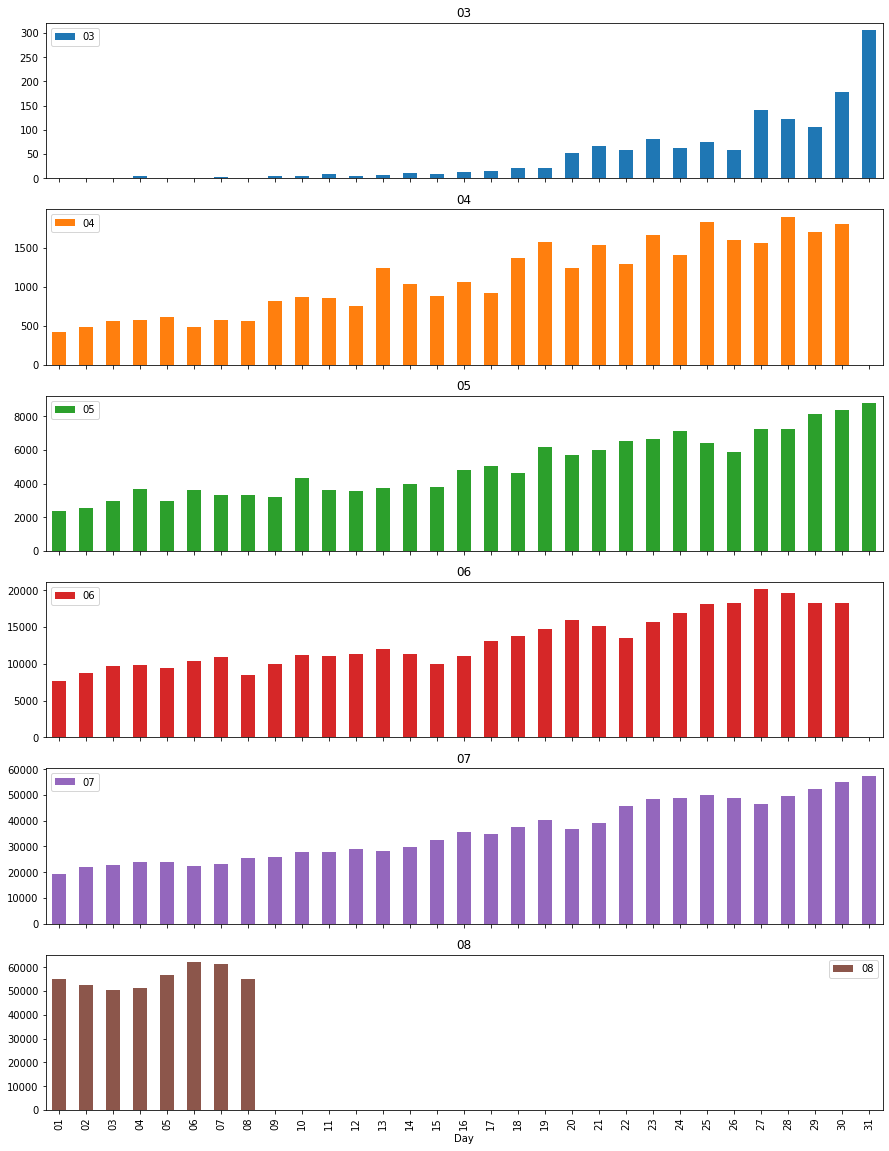

In [14]:
Month_count.unstack(level=0).plot(kind='bar',subplots=True,figsize=(15,20))

In [15]:
State = dfh.groupby('Detected State')['Num Cases'].sum().sort_values()

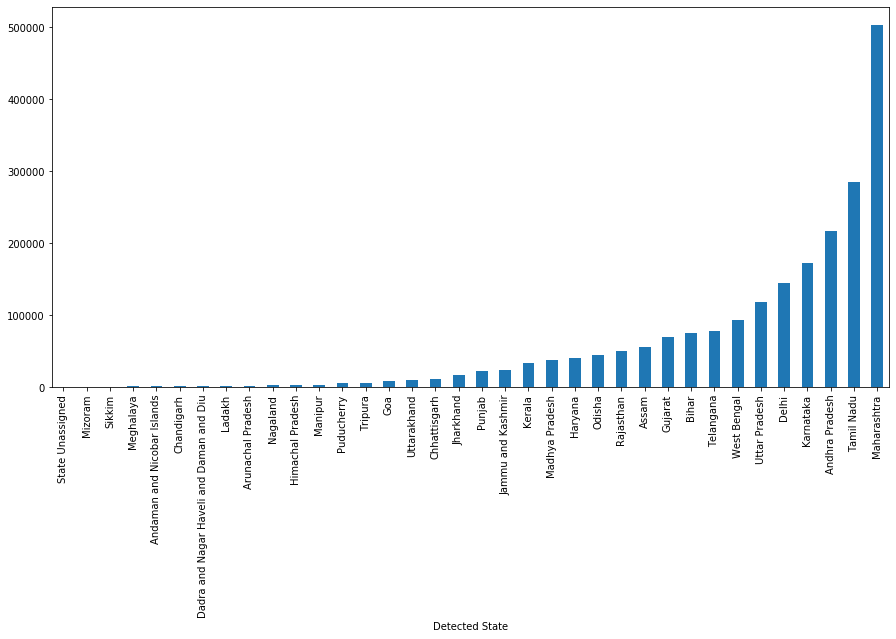

Text(0.5, 1.0, 'On log Scale')

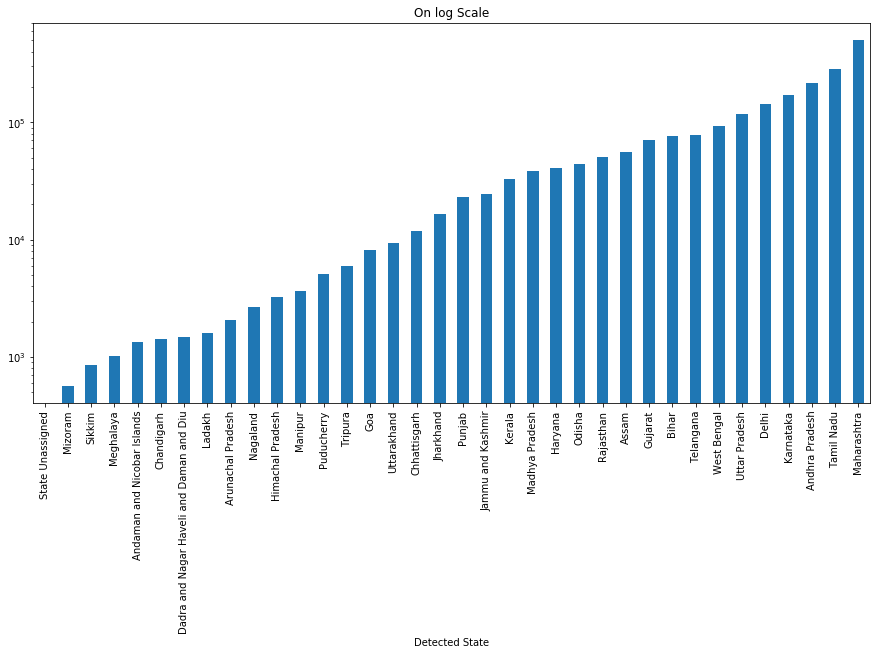

In [16]:
State.plot.bar(figsize=(15,7))
plt.show()
plt.title('Statewise Cases')
State.plot.bar(figsize=(15,7),log=True)
plt.title('On log Scale')

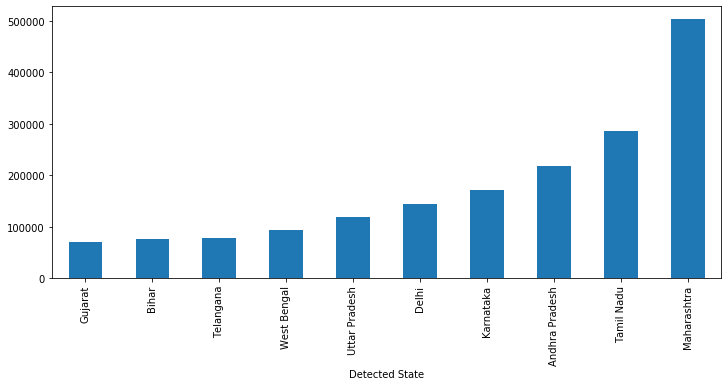

In [17]:
State_top = dfh.groupby('Detected State')['Num Cases'].sum().nlargest(10).sort_values(ascending=True)
State_top.plot.bar(figsize=(12,5))

/Users/shashanksingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


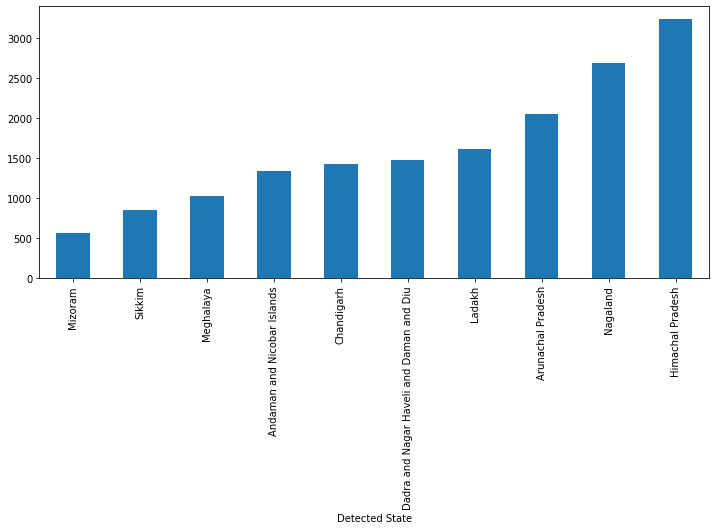

In [18]:
dfh['Detected State'].replace('State Unassigned',np.nan,inplace=True)
State_bottom= dfh.groupby('Detected State')['Num Cases'].sum().nsmallest(10).sort_values(ascending=True)
State_bottom.plot.bar(figsize=(12,5))

In [19]:
dfh['Detected State'].unique()

array(['Haryana', 'Uttar Pradesh', 'Delhi', 'Ladakh', 'Jammu and Kashmir',
       'Punjab', 'Kerala', 'Maharashtra', 'Rajasthan', 'Telangana',
       'Uttarakhand', 'Odisha', 'Puducherry', 'Tamil Nadu', 'Chandigarh',
       'Andhra Pradesh', 'Gujarat', 'West Bengal', 'Himachal Pradesh',
       'Madhya Pradesh', 'Karnataka', 'Bihar', 'Mizoram', 'Goa',
       'Chhattisgarh', 'Jharkhand', 'Assam', 'Manipur',
       'Arunachal Pradesh', nan, 'Tripura', 'Meghalaya',
       'Andaman and Nicobar Islands',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim', 'Nagaland'],
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1223157d0>,
      dtype=object)

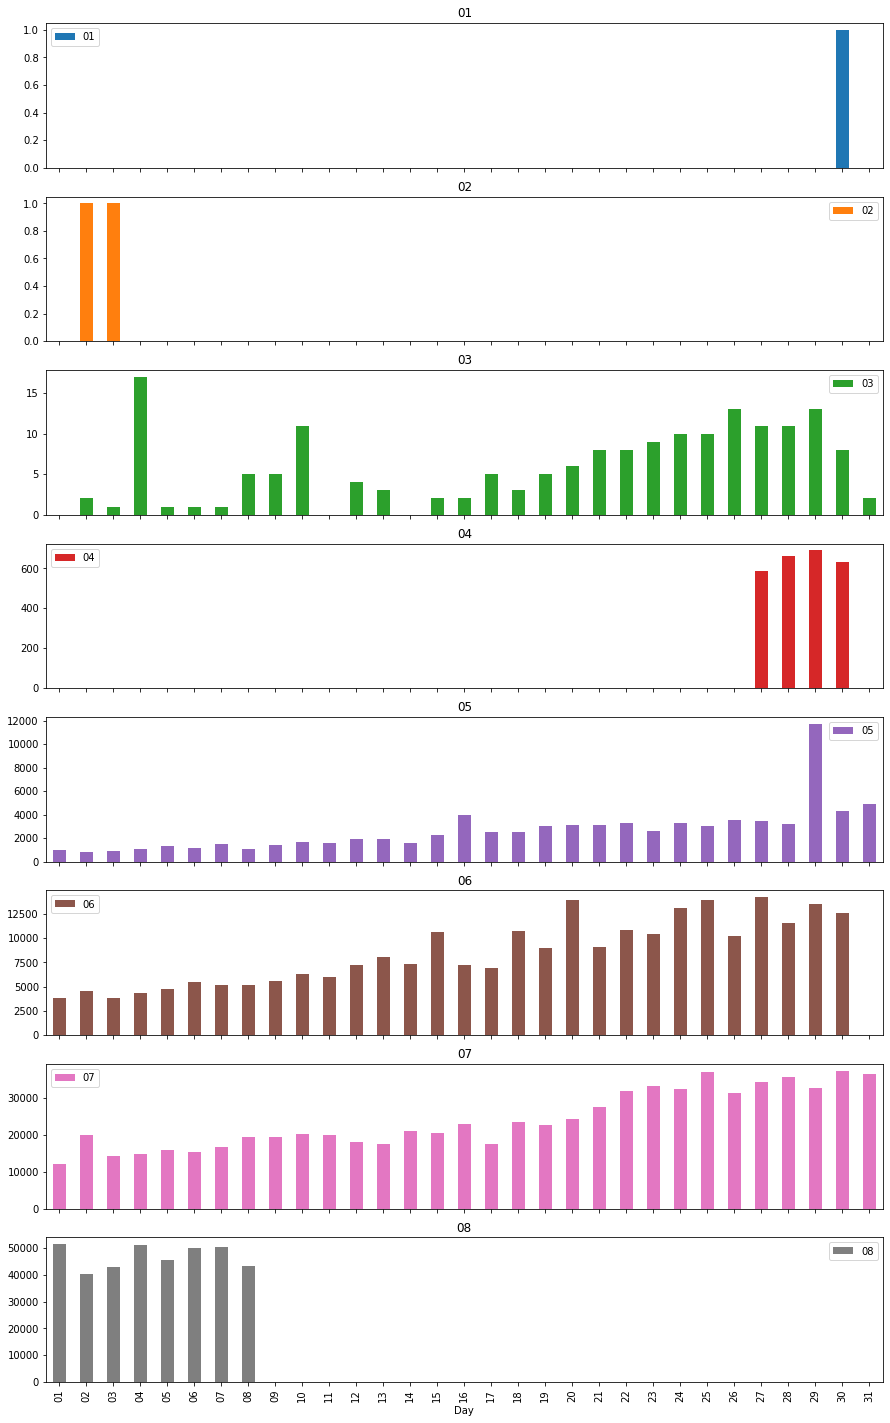

In [20]:
Month_recovery =dfr.groupby(['Month','Day'])['Num Cases'].sum()
Month_recovery.unstack(level=0).plot(kind='bar', subplots=True,figsize=(15,25))
#plt.title('Recovery Month wise',loc='center')


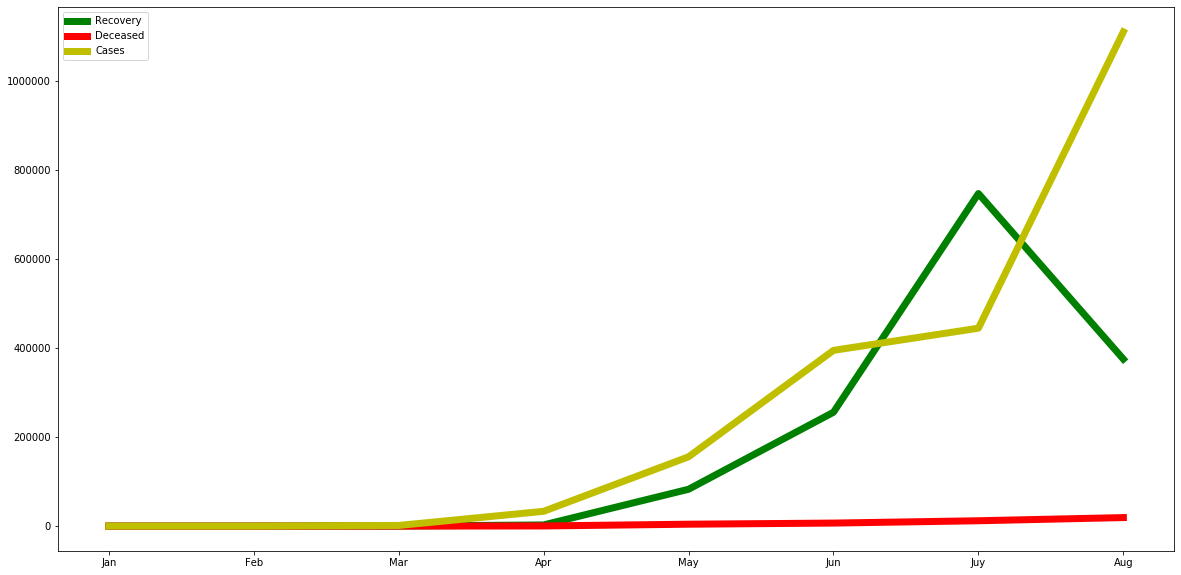

In [21]:
Month_case =dfh.groupby('Month')['Num Cases'].sum().sort_values()
Month_case
Month_case.loc[1]=0
Month_case.loc[2]=0
Month_case=Month_case.sort_values()
Month_reco =dfr.groupby('Month')['Num Cases'].sum()#.sort_values()

Month_death =dfd.groupby('Month')['Num Cases'].sum().sort_values()
Month_death
Month_death.loc[1]=0
Month_death.loc[2]=0
Month_death=Month_death.sort_values()

mon= ['Jan','Feb','Mar','Apr','May','Jun','Juy','Aug']
plt.figure(figsize=(20,10))
plt.plot(mon,Month_reco, linewidth=7,color='g')
plt.plot(mon,Month_death, linewidth=7,color='r')
plt.plot(mon,Month_case, linewidth=7,color='y')
plt.legend(['Recovery','Deceased','Cases'],loc='upper left')
#plt.fill_between(Month_reco,Month_case)
#plt.fill_between(Month_death,Month_reco)
plt.show()